# Wilczak Daniel

Assignment #6-2

# Asssignment

import modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Mouting a drive

Load and split data, then check the number of data

In [ ]:
dat=np.loadtxt('/gdrive/My Drive/xor.csv', delimiter=',', skiprows=1)
data_train=dat[:,:-1]
class_train=dat[:,-1]
print('data:', data_train.shape)
print('class:', class_train.shape)

data: (4, 2)
class: (4,)


Model building and learning

In [ ]:
model=Sequential()
model.add(Dense(5, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
metrics=['accuracy'])
print(model.summary())
fit_log=model.fit(data_train, class_train, epochs=3000, batch_size=1)

Graph accuracy

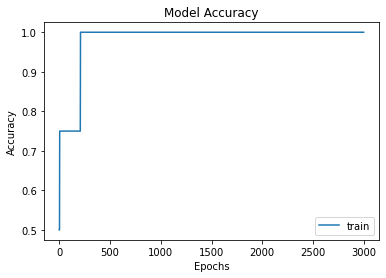

In [ ]:
plt.plot(fit_log.history['accuracy'], label='train')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Find the predicted value for the training data

In [ ]:
print(model.predict(data_train))

[[3.7348880e-05]
 [9.9999195e-01]
 [9.9999249e-01]
 [4.8269358e-06]]


# Optional

Draw a separating hyperplane: teaching signal

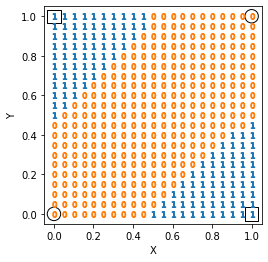

In [ ]:
t1=data_train[class_train==1]
t0=data_train[class_train==0]
t1_x=t1[:,0]
t1_y=t1[:,1]
t0_x=t0[:,0]
t0_y=t0[:,1]

g=np.loadtxt('grid01_21x21.csv', delimiter=',')
pred_g=model.predict(g)[:, 0]
g1=g[pred_g>=0.5]
g0=g[pred_g<0.5]
g1_x=g1[:, 0]
g1_y=g1[:, 1]
g0_x=g0[:, 0]
g0_y=g0[:, 1]

plt.scatter(t1_x,t1_y,marker='s',facecolors='none',edgecolors='black',s=180)
plt.scatter(t0_x,t0_y,marker='o',facecolors='none',edgecolors='black',s=180)
plt.scatter(g1_x,g1_y,marker='$1$')
plt.scatter(g0_x,g0_y,marker='$0$')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()